Getting files (from pico do couto radar and INMET). First, we will compare just the year 2021: 

In [1]:
pc_path = "../data/PC-probative-analysis/RADAR-PC/2021/"
copa_path = "../data/PC-probative-analysis/"

Building a feature (csv) from images from Pico Do couto related to a region of interest. In this case, "FORTE COPACABANA".
We know the coordinates: Lat: -22.98833333, Long: -43.19055555

In [2]:
import pandas as pd 
import cv2 
import os 

Finding the points of Forte Copacabana in the picture (250x250), knowing the reference of Pico do Couto: Lat: -22.464278, Long: -43.297476

{"id":25,"nome":"Radar - Pico do Couto\/RJ","localidade":"pc","raio":250,"lat_center":"-22.464278","lon_center":"-43.297476","lon_min":"-45.7583","lon_max":"-40.8262","lat_min":"-24.701","lat_max":"-20.2013"}

Ranges of Lat and Long:

In [3]:
lon_min = -45.7583
lon_max = -40.8262
lat_min = -24.701
lat_max = -20.2013

rate_lon = lon_max - lon_min
rate_lat = lat_max - lat_min

In [4]:
#razão:
latitude_pc = 4.4997
longitude_pc = 4.9321
        
def pontos(x,y):
    
          long_pc, lat_pc = -22.464278, -43.297476

          dist_x =  (x - long_pc) 
          dist_y = (y - lat_pc)

          x1 = 125 - (dist_x * 250 / rate_lon)
          y1 = 125 + (dist_y * 250 / rate_lat)

          x1, y1 = round(x1), round(y1)

          return y1,x1

y1, x1 = pontos(-22.98833333, -43.19055555)

In [110]:
df_pc = pd.DataFrame()

for mouth in os.listdir(pc_path):
    mouth_path = os.path.join(pc_path, mouth)
    
    for day in os.listdir(mouth_path):
        day_path = os.path.join(mouth_path, day)
        
        for picture in os.listdir(day_path):
            file = os.path.join(day_path, picture)

            name_picture = str.replace(picture,".png","")
            image = cv2.imread(file)

            df_sum = pd.DataFrame()

            for i in range(x1-1, x1+2):
                for x in range(y1-1, y1+2):

                     pixel = image[y1, x1]

                     B = pixel[0]
                     G = pixel[1]
                     R = pixel[2]

                     dic = {"R": [R], "G": [G],"B": [B]}
            
                     d_colors = pd.DataFrame(dic)
                     d_colors["timestamp"] = name_picture
                     d_colors["R"] = R
                     d_colors["G"] = G
                     d_colors["B"] = B
                     df_sum = pd.concat([df_sum,d_colors])
            print(df_sum)
            print("~~~~~~~~~~~~~~~")
            df_final = pd.DataFrame(df_sum.mean())
            df_final - df_final.T
            print(df_final)
            print("~~~~~~~~~~~~~~~")
            df_pc = pd.concat([df_final, df_pc])
            print(df_pc)


   R  G  B           timestamp
0  0  0  0  2021-08-15--211026
0  0  0  0  2021-08-15--211026
0  0  0  0  2021-08-15--211026
0  0  0  0  2021-08-15--211026
0  0  0  0  2021-08-15--211026
0  0  0  0  2021-08-15--211026
0  0  0  0  2021-08-15--211026
0  0  0  0  2021-08-15--211026
0  0  0  0  2021-08-15--211026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
   R  G  B           timestamp
0  0  0  0  2021-08-15--095026
0  0  0  0  2021-08-15--095026
0  0  0  0  2021-08-15--095026
0  0  0  0  2021-08-15--095026
0  0  0  0  2021-08-15--095026
0  0  0  0  2021-08-15--095026
0  0  0  0  2021-08-15--095026
0  0  0  0  2021-08-15--095026
0  0  0  0  2021-08-15--095026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
   R  G  B           timestamp
0  0  0  0  2021-08-15--231025
0  0  0  0  2021-08-15--231025
0  0  0  0  2021-08-15--231025
0  0  0  0  2021-08-15--231025
0  0  0  0  2021-08-15--2310

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-15--091024
0  0  0  0  2021-08-15--091024
0  0  0  0  2021-08-15--091024
0  0  0  0  2021-08-15--091024
0  0  0  0  2021-08-15--091024
0  0  0  0  2021-08-15--091024
0  0  0  0  2021-08-15--091024
0  0  0  0  2021-08-15--091024
0  0  0  0  2021-08-15--091024
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
   R  G  B           timestamp
0  0  0  0  2021-08-15--171026
0  0  0  0  2021-08-15--171026
0  0  0  0  2021-08-15--171026
0  0  0  0  2021-08-15--171026
0  0  0  0  2021-08-15--171026
0  0  0  0  2021-08-15--171026
0  0  0  0  2021-08-15--171026
0  0  0  0  2021-08-15--171026
0  0  0  0  2021-08-15--171026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-15--195026
0  0  0  0  2021-08-15--195026
0  0  0  0  2021-08-15--195026
0  0  0  0  2021-08-15--195026
0  0  0  0  2021-08-15--195026
0  0  0  0  2021-08-15--195026
0  0  0  0  2021-08-15--195026
0  0  0  0  2021-08-15--195026
0  0  0  0  2021-08-15--195026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
R  0.0
G  0.0
B  0.0
   R  G  B           timestamp
0  0  0  0  2021-08-15--025026
0  0  0  0  2021-08-15--025026
0  0  0  0  2021-08-15--025026
0  0  0  0  2021-08-15--025026
0  0  0  0  2021-08-15--025026
0  0  0  0  2021-08-15--025026
0  0  0

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-15--133025
0  0  0  0  2021-08-15--133025
0  0  0  0  2021-08-15--133025
0  0  0  0  2021-08-15--133025
0  0  0  0  2021-08-15--133025
0  0  0  0  2021-08-15--133025
0  0  0  0  2021-08-15--133025
0  0  0  0  2021-08-15--133025
0  0  0  0  2021-08-15--133025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[81 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-15--021026
0  0  0  0  2021-08-15--021026
0  0  0  0  2021-08-15--021026
0  0  0  0  2021-08-15--021026
0  0  0  0  2021-08-15--021026
0  0  0  0  2021-08-15--021026
0  0  0  0  2021-08-15--021026
0  0  0  0  2021-08-15--021026
0  0  0  0  2021-08-15--021026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[84 rows x 1 columns]
   R  G  B           t

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-15--181026
0  0  0  0  2021-08-15--181026
0  0  0  0  2021-08-15--181026
0  0  0  0  2021-08-15--181026
0  0  0  0  2021-08-15--181026
0  0  0  0  2021-08-15--181026
0  0  0  0  2021-08-15--181026
0  0  0  0  2021-08-15--181026
0  0  0  0  2021-08-15--181026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[111 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-15--143025
0  0  0  0  2021-08-15--143025
0  0  0  0  2021-08-15--143025
0  0  0  0  2021-08-15--143025
0  0  0  0  2021-08-15--143025
0  0  0  0  2021-08-15--143025
0  0  0  0  2021-08-15--143025
0  0  0  0  2021-08-15--143025
0  0  0  0  2021-08-15--143025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[114 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-15--151025
0  0  0  0  2021-08-15--151025
0  0  0  0  2021-08-15--151025
0  0  0  0  2021-08-15--151025
0  0  0  0  2021-08-15--151025
0  0  0  0  2021-08-15--151025
0  0  0  0  2021-08-15--151025
0  0  0  0  2021-08-15--151025
0  0  0  0  2021-08-15--151025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[141 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-15--121025
0  0  0  0  2021-08-15--121025
0  0  0  0  2021-08-15--121025
0  0  0  0  2021-08-15--121025
0  0  0  0  2021-08-15--121025
0  0  0  0  2021-08-15--121025
0  0  0  0  2021-08-15--121025
0  0  0  0  2021-08-15--121025
0  0  0  0  2021-08-15--121025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[144 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[171 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-15--073026
0  0  0  0  2021-08-15--073026
0  0  0  0  2021-08-15--073026
0  0  0  0  2021-08-15--073026
0  0  0  0  2021-08-15--073026
0  0  0  0  2021-08-15--073026
0  0  0  0  2021-08-15--073026
0  0  0  0  2021-08-15--073026
0  0  0  0  2021-08-15--073026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[174 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-15--035025
0  0  0  0  2021-08-15--035025
0  0  0  0  2021-08-15--035025
0  0  0  0  2021-08-15--035025
0  0  0  0  2021-08-15--035025
0  0  0  0  2021-08-15--035025
0  0  0  0  2021-08-15--035025
0  0  0  0  2021-08-15--035025
0  0  0  0  2021-08-15--035025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-15--033025
0  0  0  0  2021-08-15--033025
0  0  0  0  2021-08-15--033025
0  0  0  0  2021-08-15--033025
0  0  0  0  2021-08-15--033025
0  0  0  0  2021-08-15--033025
0  0  0  0  2021-08-15--033025
0  0  0  0  2021-08-15--033025
0  0  0  0  2021-08-15--033025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[201 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-15--123026
0  0  0  0  2021-08-15--123026
0  0  0  0  2021-08-15--123026
0  0  0  0  2021-08-15--123026
0  0  0  0  2021-08-15--123026
0  0  0  0  2021-08-15--123026
0  0  0  0  2021-08-15--123026
0  0  0  0  2021-08-15--123026
0  0  0  0  2021-08-15--123026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[204 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-12--023026
0  0  0  0  2021-08-12--023026
0  0  0  0  2021-08-12--023026
0  0  0  0  2021-08-12--023026
0  0  0  0  2021-08-12--023026
0  0  0  0  2021-08-12--023026
0  0  0  0  2021-08-12--023026
0  0  0  0  2021-08-12--023026
0  0  0  0  2021-08-12--023026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[234 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-12--191026
0  0  0  0  2021-08-12--191026
0  0  0  0  2021-08-12--191026
0  0  0  0  2021-08-12--191026
0  0  0  0  2021-08-12--191026
0  0  0  0  2021-08-12--191026
0  0  0  0  2021-08-12--191026
0  0  0  0  2021-08-12--191026
0  0  0  0  2021-08-12--191026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[237 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-12--113026
0  0  0  0  2021-08-12--113026
0  0  0  0  2021-08-12--113026
0  0  0  0  2021-08-12--113026
0  0  0  0  2021-08-12--113026
0  0  0  0  2021-08-12--113026
0  0  0  0  2021-08-12--113026
0  0  0  0  2021-08-12--113026
0  0  0  0  2021-08-12--113026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[264 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-12--013026
0  0  0  0  2021-08-12--013026
0  0  0  0  2021-08-12--013026
0  0  0  0  2021-08-12--013026
0  0  0  0  2021-08-12--013026
0  0  0  0  2021-08-12--013026
0  0  0  0  2021-08-12--013026
0  0  0  0  2021-08-12--013026
0  0  0  0  2021-08-12--013026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[267 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[291 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-12--045026
0  0  0  0  2021-08-12--045026
0  0  0  0  2021-08-12--045026
0  0  0  0  2021-08-12--045026
0  0  0  0  2021-08-12--045026
0  0  0  0  2021-08-12--045026
0  0  0  0  2021-08-12--045026
0  0  0  0  2021-08-12--045026
0  0  0  0  2021-08-12--045026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[294 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-12--081026
0  0  0  0  2021-08-12--081026
0  0  0  0  2021-08-12--081026
0  0  0  0  2021-08-12--081026
0  0  0  0  2021-08-12--081026
0  0  0  0  2021-08-12--081026
0  0  0  0  2021-08-12--081026
0  0  0  0  2021-08-12--081026
0  0  0  0  2021-08-12--081026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-12--105025
0  0  0  0  2021-08-12--105025
0  0  0  0  2021-08-12--105025
0  0  0  0  2021-08-12--105025
0  0  0  0  2021-08-12--105025
0  0  0  0  2021-08-12--105025
0  0  0  0  2021-08-12--105025
0  0  0  0  2021-08-12--105025
0  0  0  0  2021-08-12--105025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[312 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-12--231025
0  0  0  0  2021-08-12--231025
0  0  0  0  2021-08-12--231025
0  0  0  0  2021-08-12--231025
0  0  0  0  2021-08-12--231025
0  0  0  0  2021-08-12--231025
0  0  0  0  2021-08-12--231025
0  0  0  0  2021-08-12--231025
0  0  0  0  2021-08-12--231025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[315 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-12--111026
0  0  0  0  2021-08-12--111026
0  0  0  0  2021-08-12--111026
0  0  0  0  2021-08-12--111026
0  0  0  0  2021-08-12--111026
0  0  0  0  2021-08-12--111026
0  0  0  0  2021-08-12--111026
0  0  0  0  2021-08-12--111026
0  0  0  0  2021-08-12--111026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[342 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-12--215025
0  0  0  0  2021-08-12--215025
0  0  0  0  2021-08-12--215025
0  0  0  0  2021-08-12--215025
0  0  0  0  2021-08-12--215025
0  0  0  0  2021-08-12--215025
0  0  0  0  2021-08-12--215025
0  0  0  0  2021-08-12--215025
0  0  0  0  2021-08-12--215025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[345 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-12--061026
0  0  0  0  2021-08-12--061026
0  0  0  0  2021-08-12--061026
0  0  0  0  2021-08-12--061026
0  0  0  0  2021-08-12--061026
0  0  0  0  2021-08-12--061026
0  0  0  0  2021-08-12--061026
0  0  0  0  2021-08-12--061026
0  0  0  0  2021-08-12--061026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[369 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-12--123026
0  0  0  0  2021-08-12--123026
0  0  0  0  2021-08-12--123026
0  0  0  0  2021-08-12--123026
0  0  0  0  2021-08-12--123026
0  0  0  0  2021-08-12--123026
0  0  0  0  2021-08-12--123026
0  0  0  0  2021-08-12--123026
0  0  0  0  2021-08-12--123026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[372 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-12--151026
0  0  0  0  2021-08-12--151026
0  0  0  0  2021-08-12--151026
0  0  0  0  2021-08-12--151026
0  0  0  0  2021-08-12--151026
0  0  0  0  2021-08-12--151026
0  0  0  0  2021-08-12--151026
0  0  0  0  2021-08-12--151026
0  0  0  0  2021-08-12--151026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[396 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-12--133026
0  0  0  0  2021-08-12--133026
0  0  0  0  2021-08-12--133026
0  0  0  0  2021-08-12--133026
0  0  0  0  2021-08-12--133026
0  0  0  0  2021-08-12--133026
0  0  0  0  2021-08-12--133026
0  0  0  0  2021-08-12--133026
0  0  0  0  2021-08-12--133026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[399 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-12--091026
0  0  0  0  2021-08-12--091026
0  0  0  0  2021-08-12--091026
0  0  0  0  2021-08-12--091026
0  0  0  0  2021-08-12--091026
0  0  0  0  2021-08-12--091026
0  0  0  0  2021-08-12--091026
0  0  0  0  2021-08-12--091026
0  0  0  0  2021-08-12--091026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[432 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-26--055025
0  0  0  0  2021-08-26--055025
0  0  0  0  2021-08-26--055025
0  0  0  0  2021-08-26--055025
0  0  0  0  2021-08-26--055025
0  0  0  0  2021-08-26--055025
0  0  0  0  2021-08-26--055025
0  0  0  0  2021-08-26--055025
0  0  0  0  2021-08-26--055025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[435 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-26--143027
0  0  0  0  2021-08-26--143027
0  0  0  0  2021-08-26--143027
0  0  0  0  2021-08-26--143027
0  0  0  0  2021-08-26--143027
0  0  0  0  2021-08-26--143027
0  0  0  0  2021-08-26--143027
0  0  0  0  2021-08-26--143027
0  0  0  0  2021-08-26--143027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[465 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-26--015026
0  0  0  0  2021-08-26--015026
0  0  0  0  2021-08-26--015026
0  0  0  0  2021-08-26--015026
0  0  0  0  2021-08-26--015026
0  0  0  0  2021-08-26--015026
0  0  0  0  2021-08-26--015026
0  0  0  0  2021-08-26--015026
0  0  0  0  2021-08-26--015026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[468 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-26--213026
0  0  0  0  2021-08-26--213026
0  0  0  0  2021-08-26--213026
0  0  0  0  2021-08-26--213026
0  0  0  0  2021-08-26--213026
0  0  0  0  2021-08-26--213026
0  0  0  0  2021-08-26--213026
0  0  0  0  2021-08-26--213026
0  0  0  0  2021-08-26--213026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[498 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-26--051026
0  0  0  0  2021-08-26--051026
0  0  0  0  2021-08-26--051026
0  0  0  0  2021-08-26--051026
0  0  0  0  2021-08-26--051026
0  0  0  0  2021-08-26--051026
0  0  0  0  2021-08-26--051026
0  0  0  0  2021-08-26--051026
0  0  0  0  2021-08-26--051026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[501 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-26--091026
0  0  0  0  2021-08-26--091026
0  0  0  0  2021-08-26--091026
0  0  0  0  2021-08-26--091026
0  0  0  0  2021-08-26--091026
0  0  0  0  2021-08-26--091026
0  0  0  0  2021-08-26--091026
0  0  0  0  2021-08-26--091026
0  0  0  0  2021-08-26--091026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[528 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-26--221027
0  0  0  0  2021-08-26--221027
0  0  0  0  2021-08-26--221027
0  0  0  0  2021-08-26--221027
0  0  0  0  2021-08-26--221027
0  0  0  0  2021-08-26--221027
0  0  0  0  2021-08-26--221027
0  0  0  0  2021-08-26--221027
0  0  0  0  2021-08-26--221027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[531 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[558 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-26--061026
0  0  0  0  2021-08-26--061026
0  0  0  0  2021-08-26--061026
0  0  0  0  2021-08-26--061026
0  0  0  0  2021-08-26--061026
0  0  0  0  2021-08-26--061026
0  0  0  0  2021-08-26--061026
0  0  0  0  2021-08-26--061026
0  0  0  0  2021-08-26--061026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[561 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-26--041026
0  0  0  0  2021-08-26--041026
0  0  0  0  2021-08-26--041026
0  0  0  0  2021-08-26--041026
0  0  0  0  2021-08-26--041026
0  0  0  0  2021-08-26--041026
0  0  0  0  2021-08-26--041026
0  0  0  0  2021-08-26--041026
0  0  0  0  2021-08-26--041026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[579 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-26--043026
0  0  0  0  2021-08-26--043026
0  0  0  0  2021-08-26--043026
0  0  0  0  2021-08-26--043026
0  0  0  0  2021-08-26--043026
0  0  0  0  2021-08-26--043026
0  0  0  0  2021-08-26--043026
0  0  0  0  2021-08-26--043026
0  0  0  0  2021-08-26--043026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[582 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-26--145026
0  0  0  0  2021-08-26--145026
0  0  0  0  2021-08-26--145026
0  0  0  0  2021-08-26--145026
0  0  0  0  2021-08-26--145026
0  0  0  0  2021-08-26--145026
0  0  0  0  2021-08-26--145026
0  0  0  0  2021-08-26--145026
0  0  0  0  2021-08-26--145026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-26--131026
0  0  0  0  2021-08-26--131026
0  0  0  0  2021-08-26--131026
0  0  0  0  2021-08-26--131026
0  0  0  0  2021-08-26--131026
0  0  0  0  2021-08-26--131026
0  0  0  0  2021-08-26--131026
0  0  0  0  2021-08-26--131026
0  0  0  0  2021-08-26--131026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[612 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-26--191027
0  0  0  0  2021-08-26--191027
0  0  0  0  2021-08-26--191027
0  0  0  0  2021-08-26--191027
0  0  0  0  2021-08-26--191027
0  0  0  0  2021-08-26--191027
0  0  0  0  2021-08-26--191027
0  0  0  0  2021-08-26--191027
0  0  0  0  2021-08-26--191027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[615 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-26--035026
0  0  0  0  2021-08-26--035026
0  0  0  0  2021-08-26--035026
0  0  0  0  2021-08-26--035026
0  0  0  0  2021-08-26--035026
0  0  0  0  2021-08-26--035026
0  0  0  0  2021-08-26--035026
0  0  0  0  2021-08-26--035026
0  0  0  0  2021-08-26--035026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[642 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-26--205026
0  0  0  0  2021-08-26--205026
0  0  0  0  2021-08-26--205026
0  0  0  0  2021-08-26--205026
0  0  0  0  2021-08-26--205026
0  0  0  0  2021-08-26--205026
0  0  0  0  2021-08-26--205026
0  0  0  0  2021-08-26--205026
0  0  0  0  2021-08-26--205026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[645 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-18--235026
0  0  0  0  2021-08-18--235026
0  0  0  0  2021-08-18--235026
0  0  0  0  2021-08-18--235026
0  0  0  0  2021-08-18--235026
0  0  0  0  2021-08-18--235026
0  0  0  0  2021-08-18--235026
0  0  0  0  2021-08-18--235026
0  0  0  0  2021-08-18--235026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[675 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-18--005026
0  0  0  0  2021-08-18--005026
0  0  0  0  2021-08-18--005026
0  0  0  0  2021-08-18--005026
0  0  0  0  2021-08-18--005026
0  0  0  0  2021-08-18--005026
0  0  0  0  2021-08-18--005026
0  0  0  0  2021-08-18--005026
0  0  0  0  2021-08-18--005026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[678 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-18--033026
0  0  0  0  2021-08-18--033026
0  0  0  0  2021-08-18--033026
0  0  0  0  2021-08-18--033026
0  0  0  0  2021-08-18--033026
0  0  0  0  2021-08-18--033026
0  0  0  0  2021-08-18--033026
0  0  0  0  2021-08-18--033026
0  0  0  0  2021-08-18--033026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[708 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-18--055026
0  0  0  0  2021-08-18--055026
0  0  0  0  2021-08-18--055026
0  0  0  0  2021-08-18--055026
0  0  0  0  2021-08-18--055026
0  0  0  0  2021-08-18--055026
0  0  0  0  2021-08-18--055026
0  0  0  0  2021-08-18--055026
0  0  0  0  2021-08-18--055026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[711 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-18--163025
0  0  0  0  2021-08-18--163025
0  0  0  0  2021-08-18--163025
0  0  0  0  2021-08-18--163025
0  0  0  0  2021-08-18--163025
0  0  0  0  2021-08-18--163025
0  0  0  0  2021-08-18--163025
0  0  0  0  2021-08-18--163025
0  0  0  0  2021-08-18--163025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[741 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-18--233026
0  0  0  0  2021-08-18--233026
0  0  0  0  2021-08-18--233026
0  0  0  0  2021-08-18--233026
0  0  0  0  2021-08-18--233026
0  0  0  0  2021-08-18--233026
0  0  0  0  2021-08-18--233026
0  0  0  0  2021-08-18--233026
0  0  0  0  2021-08-18--233026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[744 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-18--061026
0  0  0  0  2021-08-18--061026
0  0  0  0  2021-08-18--061026
0  0  0  0  2021-08-18--061026
0  0  0  0  2021-08-18--061026
0  0  0  0  2021-08-18--061026
0  0  0  0  2021-08-18--061026
0  0  0  0  2021-08-18--061026
0  0  0  0  2021-08-18--061026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[765 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-18--085026
0  0  0  0  2021-08-18--085026
0  0  0  0  2021-08-18--085026
0  0  0  0  2021-08-18--085026
0  0  0  0  2021-08-18--085026
0  0  0  0  2021-08-18--085026
0  0  0  0  2021-08-18--085026
0  0  0  0  2021-08-18--085026
0  0  0  0  2021-08-18--085026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[768 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-18--091026
0  0  0  0  2021-08-18--091026
0  0  0  0  2021-08-18--091026
0  0  0  0  2021-08-18--091026
0  0  0  0  2021-08-18--091026
0  0  0  0  2021-08-18--091026
0  0  0  0  2021-08-18--091026
0  0  0  0  2021-08-18--091026
0  0  0  0  2021-08-18--091026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[792 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-18--023026
0  0  0  0  2021-08-18--023026
0  0  0  0  2021-08-18--023026
0  0  0  0  2021-08-18--023026
0  0  0  0  2021-08-18--023026
0  0  0  0  2021-08-18--023026
0  0  0  0  2021-08-18--023026
0  0  0  0  2021-08-18--023026
0  0  0  0  2021-08-18--023026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[795 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-18--045026
0  0  0  0  2021-08-18--045026
0  0  0  0  2021-08-18--045026
0  0  0  0  2021-08-18--045026
0  0  0  0  2021-08-18--045026
0  0  0  0  2021-08-18--045026
0  0  0  0  2021-08-18--045026
0  0  0  0  2021-08-18--045026
0  0  0  0  2021-08-18--045026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[822 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-18--021026
0  0  0  0  2021-08-18--021026
0  0  0  0  2021-08-18--021026
0  0  0  0  2021-08-18--021026
0  0  0  0  2021-08-18--021026
0  0  0  0  2021-08-18--021026
0  0  0  0  2021-08-18--021026
0  0  0  0  2021-08-18--021026
0  0  0  0  2021-08-18--021026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[825 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-18--173027
0  0  0  0  2021-08-18--173027
0  0  0  0  2021-08-18--173027
0  0  0  0  2021-08-18--173027
0  0  0  0  2021-08-18--173027
0  0  0  0  2021-08-18--173027
0  0  0  0  2021-08-18--173027
0  0  0  0  2021-08-18--173027
0  0  0  0  2021-08-18--173027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[852 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-18--125026
0  0  0  0  2021-08-18--125026
0  0  0  0  2021-08-18--125026
0  0  0  0  2021-08-18--125026
0  0  0  0  2021-08-18--125026
0  0  0  0  2021-08-18--125026
0  0  0  0  2021-08-18--125026
0  0  0  0  2021-08-18--125026
0  0  0  0  2021-08-18--125026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[855 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-08--195026
0  0  0  0  2021-08-08--195026
0  0  0  0  2021-08-08--195026
0  0  0  0  2021-08-08--195026
0  0  0  0  2021-08-08--195026
0  0  0  0  2021-08-08--195026
0  0  0  0  2021-08-08--195026
0  0  0  0  2021-08-08--195026
0  0  0  0  2021-08-08--195026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[885 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-08--055027
0  0  0  0  2021-08-08--055027
0  0  0  0  2021-08-08--055027
0  0  0  0  2021-08-08--055027
0  0  0  0  2021-08-08--055027
0  0  0  0  2021-08-08--055027
0  0  0  0  2021-08-08--055027
0  0  0  0  2021-08-08--055027
0  0  0  0  2021-08-08--055027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[888 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-08--021026
0  0  0  0  2021-08-08--021026
0  0  0  0  2021-08-08--021026
0  0  0  0  2021-08-08--021026
0  0  0  0  2021-08-08--021026
0  0  0  0  2021-08-08--021026
0  0  0  0  2021-08-08--021026
0  0  0  0  2021-08-08--021026
0  0  0  0  2021-08-08--021026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[918 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-08--145026
0  0  0  0  2021-08-08--145026
0  0  0  0  2021-08-08--145026
0  0  0  0  2021-08-08--145026
0  0  0  0  2021-08-08--145026
0  0  0  0  2021-08-08--145026
0  0  0  0  2021-08-08--145026
0  0  0  0  2021-08-08--145026
0  0  0  0  2021-08-08--145026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[921 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-08--093026
0  0  0  0  2021-08-08--093026
0  0  0  0  2021-08-08--093026
0  0  0  0  2021-08-08--093026
0  0  0  0  2021-08-08--093026
0  0  0  0  2021-08-08--093026
0  0  0  0  2021-08-08--093026
0  0  0  0  2021-08-08--093026
0  0  0  0  2021-08-08--093026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[951 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-08--191026
0  0  0  0  2021-08-08--191026
0  0  0  0  2021-08-08--191026
0  0  0  0  2021-08-08--191026
0  0  0  0  2021-08-08--191026
0  0  0  0  2021-08-08--191026
0  0  0  0  2021-08-08--191026
0  0  0  0  2021-08-08--191026
0  0  0  0  2021-08-08--191026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[954 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-08--051026
0  0  0  0  2021-08-08--051026
0  0  0  0  2021-08-08--051026
0  0  0  0  2021-08-08--051026
0  0  0  0  2021-08-08--051026
0  0  0  0  2021-08-08--051026
0  0  0  0  2021-08-08--051026
0  0  0  0  2021-08-08--051026
0  0  0  0  2021-08-08--051026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[981 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-08--225026
0  0  0  0  2021-08-08--225026
0  0  0  0  2021-08-08--225026
0  0  0  0  2021-08-08--225026
0  0  0  0  2021-08-08--225026
0  0  0  0  2021-08-08--225026
0  0  0  0  2021-08-08--225026
0  0  0  0  2021-08-08--225026
0  0  0  0  2021-08-08--225026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[984 rows x 1 columns]
   R  G  B          

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1008 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-08--023026
0  0  0  0  2021-08-08--023026
0  0  0  0  2021-08-08--023026
0  0  0  0  2021-08-08--023026
0  0  0  0  2021-08-08--023026
0  0  0  0  2021-08-08--023026
0  0  0  0  2021-08-08--023026
0  0  0  0  2021-08-08--023026
0  0  0  0  2021-08-08--023026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1011 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-08--031026
0  0  0  0  2021-08-08--031026
0  0  0  0  2021-08-08--031026
0  0  0  0  2021-08-08--031026
0  0  0  0  2021-08-08--031026
0  0  0  0  2021-08-08--031026
0  0  0  0  2021-08-08--031026
0  0  0  0  2021-08-08--031026
0  0  0  0  2021-08-08--031026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-08--165026
0  0  0  0  2021-08-08--165026
0  0  0  0  2021-08-08--165026
0  0  0  0  2021-08-08--165026
0  0  0  0  2021-08-08--165026
0  0  0  0  2021-08-08--165026
0  0  0  0  2021-08-08--165026
0  0  0  0  2021-08-08--165026
0  0  0  0  2021-08-08--165026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1041 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-08--111026
0  0  0  0  2021-08-08--111026
0  0  0  0  2021-08-08--111026
0  0  0  0  2021-08-08--111026
0  0  0  0  2021-08-08--111026
0  0  0  0  2021-08-08--111026
0  0  0  0  2021-08-08--111026
0  0  0  0  2021-08-08--111026
0  0  0  0  2021-08-08--111026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1044 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-08--025026
0  0  0  0  2021-08-08--025026
0  0  0  0  2021-08-08--025026
0  0  0  0  2021-08-08--025026
0  0  0  0  2021-08-08--025026
0  0  0  0  2021-08-08--025026
0  0  0  0  2021-08-08--025026
0  0  0  0  2021-08-08--025026
0  0  0  0  2021-08-08--025026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1074 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-08--073025
0  0  0  0  2021-08-08--073025
0  0  0  0  2021-08-08--073025
0  0  0  0  2021-08-08--073025
0  0  0  0  2021-08-08--073025
0  0  0  0  2021-08-08--073025
0  0  0  0  2021-08-08--073025
0  0  0  0  2021-08-08--073025
0  0  0  0  2021-08-08--073025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1077 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-06--053026
0  0  0  0  2021-08-06--053026
0  0  0  0  2021-08-06--053026
0  0  0  0  2021-08-06--053026
0  0  0  0  2021-08-06--053026
0  0  0  0  2021-08-06--053026
0  0  0  0  2021-08-06--053026
0  0  0  0  2021-08-06--053026
0  0  0  0  2021-08-06--053026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1107 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-06--141027
0  0  0  0  2021-08-06--141027
0  0  0  0  2021-08-06--141027
0  0  0  0  2021-08-06--141027
0  0  0  0  2021-08-06--141027
0  0  0  0  2021-08-06--141027
0  0  0  0  2021-08-06--141027
0  0  0  0  2021-08-06--141027
0  0  0  0  2021-08-06--141027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1110 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-06--033026
0  0  0  0  2021-08-06--033026
0  0  0  0  2021-08-06--033026
0  0  0  0  2021-08-06--033026
0  0  0  0  2021-08-06--033026
0  0  0  0  2021-08-06--033026
0  0  0  0  2021-08-06--033026
0  0  0  0  2021-08-06--033026
0  0  0  0  2021-08-06--033026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1137 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-06--003026
0  0  0  0  2021-08-06--003026
0  0  0  0  2021-08-06--003026
0  0  0  0  2021-08-06--003026
0  0  0  0  2021-08-06--003026
0  0  0  0  2021-08-06--003026
0  0  0  0  2021-08-06--003026
0  0  0  0  2021-08-06--003026
0  0  0  0  2021-08-06--003026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1140 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-06--195027
0  0  0  0  2021-08-06--195027
0  0  0  0  2021-08-06--195027
0  0  0  0  2021-08-06--195027
0  0  0  0  2021-08-06--195027
0  0  0  0  2021-08-06--195027
0  0  0  0  2021-08-06--195027
0  0  0  0  2021-08-06--195027
0  0  0  0  2021-08-06--195027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1167 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-06--201026
0  0  0  0  2021-08-06--201026
0  0  0  0  2021-08-06--201026
0  0  0  0  2021-08-06--201026
0  0  0  0  2021-08-06--201026
0  0  0  0  2021-08-06--201026
0  0  0  0  2021-08-06--201026
0  0  0  0  2021-08-06--201026
0  0  0  0  2021-08-06--201026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1170 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-06--011027
0  0  0  0  2021-08-06--011027
0  0  0  0  2021-08-06--011027
0  0  0  0  2021-08-06--011027
0  0  0  0  2021-08-06--011027
0  0  0  0  2021-08-06--011027
0  0  0  0  2021-08-06--011027
0  0  0  0  2021-08-06--011027
0  0  0  0  2021-08-06--011027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1194 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-06--175026
0  0  0  0  2021-08-06--175026
0  0  0  0  2021-08-06--175026
0  0  0  0  2021-08-06--175026
0  0  0  0  2021-08-06--175026
0  0  0  0  2021-08-06--175026
0  0  0  0  2021-08-06--175026
0  0  0  0  2021-08-06--175026
0  0  0  0  2021-08-06--175026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1197 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-06--041026
0  0  0  0  2021-08-06--041026
0  0  0  0  2021-08-06--041026
0  0  0  0  2021-08-06--041026
0  0  0  0  2021-08-06--041026
0  0  0  0  2021-08-06--041026
0  0  0  0  2021-08-06--041026
0  0  0  0  2021-08-06--041026
0  0  0  0  2021-08-06--041026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1218 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-06--023027
0  0  0  0  2021-08-06--023027
0  0  0  0  2021-08-06--023027
0  0  0  0  2021-08-06--023027
0  0  0  0  2021-08-06--023027
0  0  0  0  2021-08-06--023027
0  0  0  0  2021-08-06--023027
0  0  0  0  2021-08-06--023027
0  0  0  0  2021-08-06--023027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1221 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-06--145026
0  0  0  0  2021-08-06--145026
0  0  0  0  2021-08-06--145026
0  0  0  0  2021-08-06--145026
0  0  0  0  2021-08-06--145026
0  0  0  0  2021-08-06--145026
0  0  0  0  2021-08-06--145026
0  0  0  0  2021-08-06--145026
0  0  0  0  2021-08-06--145026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1248 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-06--203025
0  0  0  0  2021-08-06--203025
0  0  0  0  2021-08-06--203025
0  0  0  0  2021-08-06--203025
0  0  0  0  2021-08-06--203025
0  0  0  0  2021-08-06--203025
0  0  0  0  2021-08-06--203025
0  0  0  0  2021-08-06--203025
0  0  0  0  2021-08-06--203025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1251 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-06--191026
0  0  0  0  2021-08-06--191026
0  0  0  0  2021-08-06--191026
0  0  0  0  2021-08-06--191026
0  0  0  0  2021-08-06--191026
0  0  0  0  2021-08-06--191026
0  0  0  0  2021-08-06--191026
0  0  0  0  2021-08-06--191026
0  0  0  0  2021-08-06--191026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1275 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-06--101027
0  0  0  0  2021-08-06--101027
0  0  0  0  2021-08-06--101027
0  0  0  0  2021-08-06--101027
0  0  0  0  2021-08-06--101027
0  0  0  0  2021-08-06--101027
0  0  0  0  2021-08-06--101027
0  0  0  0  2021-08-06--101027
0  0  0  0  2021-08-06--101027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1278 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-23--113026
0  0  0  0  2021-08-23--113026
0  0  0  0  2021-08-23--113026
0  0  0  0  2021-08-23--113026
0  0  0  0  2021-08-23--113026
0  0  0  0  2021-08-23--113026
0  0  0  0  2021-08-23--113026
0  0  0  0  2021-08-23--113026
0  0  0  0  2021-08-23--113026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1305 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-23--045026
0  0  0  0  2021-08-23--045026
0  0  0  0  2021-08-23--045026
0  0  0  0  2021-08-23--045026
0  0  0  0  2021-08-23--045026
0  0  0  0  2021-08-23--045026
0  0  0  0  2021-08-23--045026
0  0  0  0  2021-08-23--045026
0  0  0  0  2021-08-23--045026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1308 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-23--063026
0  0  0  0  2021-08-23--063026
0  0  0  0  2021-08-23--063026
0  0  0  0  2021-08-23--063026
0  0  0  0  2021-08-23--063026
0  0  0  0  2021-08-23--063026
0  0  0  0  2021-08-23--063026
0  0  0  0  2021-08-23--063026
0  0  0  0  2021-08-23--063026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1332 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-23--151026
0  0  0  0  2021-08-23--151026
0  0  0  0  2021-08-23--151026
0  0  0  0  2021-08-23--151026
0  0  0  0  2021-08-23--151026
0  0  0  0  2021-08-23--151026
0  0  0  0  2021-08-23--151026
0  0  0  0  2021-08-23--151026
0  0  0  0  2021-08-23--151026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1335 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-23--043026
0  0  0  0  2021-08-23--043026
0  0  0  0  2021-08-23--043026
0  0  0  0  2021-08-23--043026
0  0  0  0  2021-08-23--043026
0  0  0  0  2021-08-23--043026
0  0  0  0  2021-08-23--043026
0  0  0  0  2021-08-23--043026
0  0  0  0  2021-08-23--043026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1362 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-23--123025
0  0  0  0  2021-08-23--123025
0  0  0  0  2021-08-23--123025
0  0  0  0  2021-08-23--123025
0  0  0  0  2021-08-23--123025
0  0  0  0  2021-08-23--123025
0  0  0  0  2021-08-23--123025
0  0  0  0  2021-08-23--123025
0  0  0  0  2021-08-23--123025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1365 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-23--185025
0  0  0  0  2021-08-23--185025
0  0  0  0  2021-08-23--185025
0  0  0  0  2021-08-23--185025
0  0  0  0  2021-08-23--185025
0  0  0  0  2021-08-23--185025
0  0  0  0  2021-08-23--185025
0  0  0  0  2021-08-23--185025
0  0  0  0  2021-08-23--185025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1389 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-23--023027
0  0  0  0  2021-08-23--023027
0  0  0  0  2021-08-23--023027
0  0  0  0  2021-08-23--023027
0  0  0  0  2021-08-23--023027
0  0  0  0  2021-08-23--023027
0  0  0  0  2021-08-23--023027
0  0  0  0  2021-08-23--023027
0  0  0  0  2021-08-23--023027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1392 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-23--055026
0  0  0  0  2021-08-23--055026
0  0  0  0  2021-08-23--055026
0  0  0  0  2021-08-23--055026
0  0  0  0  2021-08-23--055026
0  0  0  0  2021-08-23--055026
0  0  0  0  2021-08-23--055026
0  0  0  0  2021-08-23--055026
0  0  0  0  2021-08-23--055026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1413 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-23--125026
0  0  0  0  2021-08-23--125026
0  0  0  0  2021-08-23--125026
0  0  0  0  2021-08-23--125026
0  0  0  0  2021-08-23--125026
0  0  0  0  2021-08-23--125026
0  0  0  0  2021-08-23--125026
0  0  0  0  2021-08-23--125026
0  0  0  0  2021-08-23--125026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1416 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-23--005026
0  0  0  0  2021-08-23--005026
0  0  0  0  2021-08-23--005026
0  0  0  0  2021-08-23--005026
0  0  0  0  2021-08-23--005026
0  0  0  0  2021-08-23--005026
0  0  0  0  2021-08-23--005026
0  0  0  0  2021-08-23--005026
0  0  0  0  2021-08-23--005026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1446 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-23--011026
0  0  0  0  2021-08-23--011026
0  0  0  0  2021-08-23--011026
0  0  0  0  2021-08-23--011026
0  0  0  0  2021-08-23--011026
0  0  0  0  2021-08-23--011026
0  0  0  0  2021-08-23--011026
0  0  0  0  2021-08-23--011026
0  0  0  0  2021-08-23--011026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1449 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-23--061026
0  0  0  0  2021-08-23--061026
0  0  0  0  2021-08-23--061026
0  0  0  0  2021-08-23--061026
0  0  0  0  2021-08-23--061026
0  0  0  0  2021-08-23--061026
0  0  0  0  2021-08-23--061026
0  0  0  0  2021-08-23--061026
0  0  0  0  2021-08-23--061026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1476 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-23--205027
0  0  0  0  2021-08-23--205027
0  0  0  0  2021-08-23--205027
0  0  0  0  2021-08-23--205027
0  0  0  0  2021-08-23--205027
0  0  0  0  2021-08-23--205027
0  0  0  0  2021-08-23--205027
0  0  0  0  2021-08-23--205027
0  0  0  0  2021-08-23--205027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1479 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1503 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-23--075027
0  0  0  0  2021-08-23--075027
0  0  0  0  2021-08-23--075027
0  0  0  0  2021-08-23--075027
0  0  0  0  2021-08-23--075027
0  0  0  0  2021-08-23--075027
0  0  0  0  2021-08-23--075027
0  0  0  0  2021-08-23--075027
0  0  0  0  2021-08-23--075027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1506 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-23--181027
0  0  0  0  2021-08-23--181027
0  0  0  0  2021-08-23--181027
0  0  0  0  2021-08-23--181027
0  0  0  0  2021-08-23--181027
0  0  0  0  2021-08-23--181027
0  0  0  0  2021-08-23--181027
0  0  0  0  2021-08-23--181027
0  0  0  0  2021-08-23--181027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G 

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-21--131026
0  0  0  0  2021-08-21--131026
0  0  0  0  2021-08-21--131026
0  0  0  0  2021-08-21--131026
0  0  0  0  2021-08-21--131026
0  0  0  0  2021-08-21--131026
0  0  0  0  2021-08-21--131026
0  0  0  0  2021-08-21--131026
0  0  0  0  2021-08-21--131026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1530 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-21--205026
0  0  0  0  2021-08-21--205026
0  0  0  0  2021-08-21--205026
0  0  0  0  2021-08-21--205026
0  0  0  0  2021-08-21--205026
0  0  0  0  2021-08-21--205026
0  0  0  0  2021-08-21--205026
0  0  0  0  2021-08-21--205026
0  0  0  0  2021-08-21--205026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1533 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-21--145026
0  0  0  0  2021-08-21--145026
0  0  0  0  2021-08-21--145026
0  0  0  0  2021-08-21--145026
0  0  0  0  2021-08-21--145026
0  0  0  0  2021-08-21--145026
0  0  0  0  2021-08-21--145026
0  0  0  0  2021-08-21--145026
0  0  0  0  2021-08-21--145026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1563 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-21--185026
0  0  0  0  2021-08-21--185026
0  0  0  0  2021-08-21--185026
0  0  0  0  2021-08-21--185026
0  0  0  0  2021-08-21--185026
0  0  0  0  2021-08-21--185026
0  0  0  0  2021-08-21--185026
0  0  0  0  2021-08-21--185026
0  0  0  0  2021-08-21--185026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1566 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-21--033026
0  0  0  0  2021-08-21--033026
0  0  0  0  2021-08-21--033026
0  0  0  0  2021-08-21--033026
0  0  0  0  2021-08-21--033026
0  0  0  0  2021-08-21--033026
0  0  0  0  2021-08-21--033026
0  0  0  0  2021-08-21--033026
0  0  0  0  2021-08-21--033026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1587 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-21--125026
0  0  0  0  2021-08-21--125026
0  0  0  0  2021-08-21--125026
0  0  0  0  2021-08-21--125026
0  0  0  0  2021-08-21--125026
0  0  0  0  2021-08-21--125026
0  0  0  0  2021-08-21--125026
0  0  0  0  2021-08-21--125026
0  0  0  0  2021-08-21--125026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1590 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-21--213026
0  0  0  0  2021-08-21--213026
0  0  0  0  2021-08-21--213026
0  0  0  0  2021-08-21--213026
0  0  0  0  2021-08-21--213026
0  0  0  0  2021-08-21--213026
0  0  0  0  2021-08-21--213026
0  0  0  0  2021-08-21--213026
0  0  0  0  2021-08-21--213026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1620 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-21--063026
0  0  0  0  2021-08-21--063026
0  0  0  0  2021-08-21--063026
0  0  0  0  2021-08-21--063026
0  0  0  0  2021-08-21--063026
0  0  0  0  2021-08-21--063026
0  0  0  0  2021-08-21--063026
0  0  0  0  2021-08-21--063026
0  0  0  0  2021-08-21--063026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1623 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-21--051027
0  0  0  0  2021-08-21--051027
0  0  0  0  2021-08-21--051027
0  0  0  0  2021-08-21--051027
0  0  0  0  2021-08-21--051027
0  0  0  0  2021-08-21--051027
0  0  0  0  2021-08-21--051027
0  0  0  0  2021-08-21--051027
0  0  0  0  2021-08-21--051027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1650 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-21--025026
0  0  0  0  2021-08-21--025026
0  0  0  0  2021-08-21--025026
0  0  0  0  2021-08-21--025026
0  0  0  0  2021-08-21--025026
0  0  0  0  2021-08-21--025026
0  0  0  0  2021-08-21--025026
0  0  0  0  2021-08-21--025026
0  0  0  0  2021-08-21--025026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1653 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-21--031027
0  0  0  0  2021-08-21--031027
0  0  0  0  2021-08-21--031027
0  0  0  0  2021-08-21--031027
0  0  0  0  2021-08-21--031027
0  0  0  0  2021-08-21--031027
0  0  0  0  2021-08-21--031027
0  0  0  0  2021-08-21--031027
0  0  0  0  2021-08-21--031027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1683 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-21--071026
0  0  0  0  2021-08-21--071026
0  0  0  0  2021-08-21--071026
0  0  0  0  2021-08-21--071026
0  0  0  0  2021-08-21--071026
0  0  0  0  2021-08-21--071026
0  0  0  0  2021-08-21--071026
0  0  0  0  2021-08-21--071026
0  0  0  0  2021-08-21--071026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1686 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-21--023026
0  0  0  0  2021-08-21--023026
0  0  0  0  2021-08-21--023026
0  0  0  0  2021-08-21--023026
0  0  0  0  2021-08-21--023026
0  0  0  0  2021-08-21--023026
0  0  0  0  2021-08-21--023026
0  0  0  0  2021-08-21--023026
0  0  0  0  2021-08-21--023026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1713 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-21--081026
0  0  0  0  2021-08-21--081026
0  0  0  0  2021-08-21--081026
0  0  0  0  2021-08-21--081026
0  0  0  0  2021-08-21--081026
0  0  0  0  2021-08-21--081026
0  0  0  0  2021-08-21--081026
0  0  0  0  2021-08-21--081026
0  0  0  0  2021-08-21--081026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1716 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-25--011026
0  0  0  0  2021-08-25--011026
0  0  0  0  2021-08-25--011026
0  0  0  0  2021-08-25--011026
0  0  0  0  2021-08-25--011026
0  0  0  0  2021-08-25--011026
0  0  0  0  2021-08-25--011026
0  0  0  0  2021-08-25--011026
0  0  0  0  2021-08-25--011026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1746 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-25--065025
0  0  0  0  2021-08-25--065025
0  0  0  0  2021-08-25--065025
0  0  0  0  2021-08-25--065025
0  0  0  0  2021-08-25--065025
0  0  0  0  2021-08-25--065025
0  0  0  0  2021-08-25--065025
0  0  0  0  2021-08-25--065025
0  0  0  0  2021-08-25--065025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1749 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-25--091026
0  0  0  0  2021-08-25--091026
0  0  0  0  2021-08-25--091026
0  0  0  0  2021-08-25--091026
0  0  0  0  2021-08-25--091026
0  0  0  0  2021-08-25--091026
0  0  0  0  2021-08-25--091026
0  0  0  0  2021-08-25--091026
0  0  0  0  2021-08-25--091026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1776 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-25--221026
0  0  0  0  2021-08-25--221026
0  0  0  0  2021-08-25--221026
0  0  0  0  2021-08-25--221026
0  0  0  0  2021-08-25--221026
0  0  0  0  2021-08-25--221026
0  0  0  0  2021-08-25--221026
0  0  0  0  2021-08-25--221026
0  0  0  0  2021-08-25--221026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1779 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-25--163025
0  0  0  0  2021-08-25--163025
0  0  0  0  2021-08-25--163025
0  0  0  0  2021-08-25--163025
0  0  0  0  2021-08-25--163025
0  0  0  0  2021-08-25--163025
0  0  0  0  2021-08-25--163025
0  0  0  0  2021-08-25--163025
0  0  0  0  2021-08-25--163025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1806 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-25--015026
0  0  0  0  2021-08-25--015026
0  0  0  0  2021-08-25--015026
0  0  0  0  2021-08-25--015026
0  0  0  0  2021-08-25--015026
0  0  0  0  2021-08-25--015026
0  0  0  0  2021-08-25--015026
0  0  0  0  2021-08-25--015026
0  0  0  0  2021-08-25--015026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1809 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-25--111026
0  0  0  0  2021-08-25--111026
0  0  0  0  2021-08-25--111026
0  0  0  0  2021-08-25--111026
0  0  0  0  2021-08-25--111026
0  0  0  0  2021-08-25--111026
0  0  0  0  2021-08-25--111026
0  0  0  0  2021-08-25--111026
0  0  0  0  2021-08-25--111026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1833 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-25--043026
0  0  0  0  2021-08-25--043026
0  0  0  0  2021-08-25--043026
0  0  0  0  2021-08-25--043026
0  0  0  0  2021-08-25--043026
0  0  0  0  2021-08-25--043026
0  0  0  0  2021-08-25--043026
0  0  0  0  2021-08-25--043026
0  0  0  0  2021-08-25--043026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1836 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-25--181025
0  0  0  0  2021-08-25--181025
0  0  0  0  2021-08-25--181025
0  0  0  0  2021-08-25--181025
0  0  0  0  2021-08-25--181025
0  0  0  0  2021-08-25--181025
0  0  0  0  2021-08-25--181025
0  0  0  0  2021-08-25--181025
0  0  0  0  2021-08-25--181025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1863 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-25--071025
0  0  0  0  2021-08-25--071025
0  0  0  0  2021-08-25--071025
0  0  0  0  2021-08-25--071025
0  0  0  0  2021-08-25--071025
0  0  0  0  2021-08-25--071025
0  0  0  0  2021-08-25--071025
0  0  0  0  2021-08-25--071025
0  0  0  0  2021-08-25--071025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1866 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-25--021025
0  0  0  0  2021-08-25--021025
0  0  0  0  2021-08-25--021025
0  0  0  0  2021-08-25--021025
0  0  0  0  2021-08-25--021025
0  0  0  0  2021-08-25--021025
0  0  0  0  2021-08-25--021025
0  0  0  0  2021-08-25--021025
0  0  0  0  2021-08-25--021025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1887 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-25--083026
0  0  0  0  2021-08-25--083026
0  0  0  0  2021-08-25--083026
0  0  0  0  2021-08-25--083026
0  0  0  0  2021-08-25--083026
0  0  0  0  2021-08-25--083026
0  0  0  0  2021-08-25--083026
0  0  0  0  2021-08-25--083026
0  0  0  0  2021-08-25--083026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1890 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-25--205026
0  0  0  0  2021-08-25--205026
0  0  0  0  2021-08-25--205026
0  0  0  0  2021-08-25--205026
0  0  0  0  2021-08-25--205026
0  0  0  0  2021-08-25--205026
0  0  0  0  2021-08-25--205026
0  0  0  0  2021-08-25--205026
0  0  0  0  2021-08-25--205026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1917 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-25--025027
0  0  0  0  2021-08-25--025027
0  0  0  0  2021-08-25--025027
0  0  0  0  2021-08-25--025027
0  0  0  0  2021-08-25--025027
0  0  0  0  2021-08-25--025027
0  0  0  0  2021-08-25--025027
0  0  0  0  2021-08-25--025027
0  0  0  0  2021-08-25--025027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1920 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-25--013026
0  0  0  0  2021-08-25--013026
0  0  0  0  2021-08-25--013026
0  0  0  0  2021-08-25--013026
0  0  0  0  2021-08-25--013026
0  0  0  0  2021-08-25--013026
0  0  0  0  2021-08-25--013026
0  0  0  0  2021-08-25--013026
0  0  0  0  2021-08-25--013026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1944 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-22--175026
0  0  0  0  2021-08-22--175026
0  0  0  0  2021-08-22--175026
0  0  0  0  2021-08-22--175026
0  0  0  0  2021-08-22--175026
0  0  0  0  2021-08-22--175026
0  0  0  0  2021-08-22--175026
0  0  0  0  2021-08-22--175026
0  0  0  0  2021-08-22--175026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1947 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-22--171027
0  0  0  0  2021-08-22--171027
0  0  0  0  2021-08-22--171027
0  0  0  0  2021-08-22--171027
0  0  0  0  2021-08-22--171027
0  0  0  0  2021-08-22--171027
0  0  0  0  2021-08-22--171027
0  0  0  0  2021-08-22--171027
0  0  0  0  2021-08-22--171027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1971 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-22--015026
0  0  0  0  2021-08-22--015026
0  0  0  0  2021-08-22--015026
0  0  0  0  2021-08-22--015026
0  0  0  0  2021-08-22--015026
0  0  0  0  2021-08-22--015026
0  0  0  0  2021-08-22--015026
0  0  0  0  2021-08-22--015026
0  0  0  0  2021-08-22--015026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[1974 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-22--125027
0  0  0  0  2021-08-22--125027
0  0  0  0  2021-08-22--125027
0  0  0  0  2021-08-22--125027
0  0  0  0  2021-08-22--125027
0  0  0  0  2021-08-22--125027
0  0  0  0  2021-08-22--125027
0  0  0  0  2021-08-22--125027
0  0  0  0  2021-08-22--125027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2001 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-22--065026
0  0  0  0  2021-08-22--065026
0  0  0  0  2021-08-22--065026
0  0  0  0  2021-08-22--065026
0  0  0  0  2021-08-22--065026
0  0  0  0  2021-08-22--065026
0  0  0  0  2021-08-22--065026
0  0  0  0  2021-08-22--065026
0  0  0  0  2021-08-22--065026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2004 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-22--183026
0  0  0  0  2021-08-22--183026
0  0  0  0  2021-08-22--183026
0  0  0  0  2021-08-22--183026
0  0  0  0  2021-08-22--183026
0  0  0  0  2021-08-22--183026
0  0  0  0  2021-08-22--183026
0  0  0  0  2021-08-22--183026
0  0  0  0  2021-08-22--183026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2022 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-22--213026
0  0  0  0  2021-08-22--213026
0  0  0  0  2021-08-22--213026
0  0  0  0  2021-08-22--213026
0  0  0  0  2021-08-22--213026
0  0  0  0  2021-08-22--213026
0  0  0  0  2021-08-22--213026
0  0  0  0  2021-08-22--213026
0  0  0  0  2021-08-22--213026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2025 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-22--135026
0  0  0  0  2021-08-22--135026
0  0  0  0  2021-08-22--135026
0  0  0  0  2021-08-22--135026
0  0  0  0  2021-08-22--135026
0  0  0  0  2021-08-22--135026
0  0  0  0  2021-08-22--135026
0  0  0  0  2021-08-22--135026
0  0  0  0  2021-08-22--135026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2049 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-22--145027
0  0  0  0  2021-08-22--145027
0  0  0  0  2021-08-22--145027
0  0  0  0  2021-08-22--145027
0  0  0  0  2021-08-22--145027
0  0  0  0  2021-08-22--145027
0  0  0  0  2021-08-22--145027
0  0  0  0  2021-08-22--145027
0  0  0  0  2021-08-22--145027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2052 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-22--055025
0  0  0  0  2021-08-22--055025
0  0  0  0  2021-08-22--055025
0  0  0  0  2021-08-22--055025
0  0  0  0  2021-08-22--055025
0  0  0  0  2021-08-22--055025
0  0  0  0  2021-08-22--055025
0  0  0  0  2021-08-22--055025
0  0  0  0  2021-08-22--055025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2076 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-22--151027
0  0  0  0  2021-08-22--151027
0  0  0  0  2021-08-22--151027
0  0  0  0  2021-08-22--151027
0  0  0  0  2021-08-22--151027
0  0  0  0  2021-08-22--151027
0  0  0  0  2021-08-22--151027
0  0  0  0  2021-08-22--151027
0  0  0  0  2021-08-22--151027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2079 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2091 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-22--123027
0  0  0  0  2021-08-22--123027
0  0  0  0  2021-08-22--123027
0  0  0  0  2021-08-22--123027
0  0  0  0  2021-08-22--123027
0  0  0  0  2021-08-22--123027
0  0  0  0  2021-08-22--123027
0  0  0  0  2021-08-22--123027
0  0  0  0  2021-08-22--123027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2094 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-22--061026
0  0  0  0  2021-08-22--061026
0  0  0  0  2021-08-22--061026
0  0  0  0  2021-08-22--061026
0  0  0  0  2021-08-22--061026
0  0  0  0  2021-08-22--061026
0  0  0  0  2021-08-22--061026
0  0  0  0  2021-08-22--061026
0  0  0  0  2021-08-22--061026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-22--191027
0  0  0  0  2021-08-22--191027
0  0  0  0  2021-08-22--191027
0  0  0  0  2021-08-22--191027
0  0  0  0  2021-08-22--191027
0  0  0  0  2021-08-22--191027
0  0  0  0  2021-08-22--191027
0  0  0  0  2021-08-22--191027
0  0  0  0  2021-08-22--191027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2118 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-22--003026
0  0  0  0  2021-08-22--003026
0  0  0  0  2021-08-22--003026
0  0  0  0  2021-08-22--003026
0  0  0  0  2021-08-22--003026
0  0  0  0  2021-08-22--003026
0  0  0  0  2021-08-22--003026
0  0  0  0  2021-08-22--003026
0  0  0  0  2021-08-22--003026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2121 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-22--041026
0  0  0  0  2021-08-22--041026
0  0  0  0  2021-08-22--041026
0  0  0  0  2021-08-22--041026
0  0  0  0  2021-08-22--041026
0  0  0  0  2021-08-22--041026
0  0  0  0  2021-08-22--041026
0  0  0  0  2021-08-22--041026
0  0  0  0  2021-08-22--041026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2136 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-22--013025
0  0  0  0  2021-08-22--013025
0  0  0  0  2021-08-22--013025
0  0  0  0  2021-08-22--013025
0  0  0  0  2021-08-22--013025
0  0  0  0  2021-08-22--013025
0  0  0  0  2021-08-22--013025
0  0  0  0  2021-08-22--013025
0  0  0  0  2021-08-22--013025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2139 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-22--095026
0  0  0  0  2021-08-22--095026
0  0  0  0  2021-08-22--095026
0  0  0  0  2021-08-22--095026
0  0  0  0  2021-08-22--095026
0  0  0  0  2021-08-22--095026
0  0  0  0  2021-08-22--095026
0  0  0  0  2021-08-22--095026
0  0  0  0  2021-08-22--095026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2157 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-22--093026
0  0  0  0  2021-08-22--093026
0  0  0  0  2021-08-22--093026
0  0  0  0  2021-08-22--093026
0  0  0  0  2021-08-22--093026
0  0  0  0  2021-08-22--093026
0  0  0  0  2021-08-22--093026
0  0  0  0  2021-08-22--093026
0  0  0  0  2021-08-22--093026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2160 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-05--101027
0  0  0  0  2021-08-05--101027
0  0  0  0  2021-08-05--101027
0  0  0  0  2021-08-05--101027
0  0  0  0  2021-08-05--101027
0  0  0  0  2021-08-05--101027
0  0  0  0  2021-08-05--101027
0  0  0  0  2021-08-05--101027
0  0  0  0  2021-08-05--101027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2187 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-05--193027
0  0  0  0  2021-08-05--193027
0  0  0  0  2021-08-05--193027
0  0  0  0  2021-08-05--193027
0  0  0  0  2021-08-05--193027
0  0  0  0  2021-08-05--193027
0  0  0  0  2021-08-05--193027
0  0  0  0  2021-08-05--193027
0  0  0  0  2021-08-05--193027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2190 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2211 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-05--183027
0  0  0  0  2021-08-05--183027
0  0  0  0  2021-08-05--183027
0  0  0  0  2021-08-05--183027
0  0  0  0  2021-08-05--183027
0  0  0  0  2021-08-05--183027
0  0  0  0  2021-08-05--183027
0  0  0  0  2021-08-05--183027
0  0  0  0  2021-08-05--183027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2214 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-05--031026
0  0  0  0  2021-08-05--031026
0  0  0  0  2021-08-05--031026
0  0  0  0  2021-08-05--031026
0  0  0  0  2021-08-05--031026
0  0  0  0  2021-08-05--031026
0  0  0  0  2021-08-05--031026
0  0  0  0  2021-08-05--031026
0  0  0  0  2021-08-05--031026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G 

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-05--081027
0  0  0  0  2021-08-05--081027
0  0  0  0  2021-08-05--081027
0  0  0  0  2021-08-05--081027
0  0  0  0  2021-08-05--081027
0  0  0  0  2021-08-05--081027
0  0  0  0  2021-08-05--081027
0  0  0  0  2021-08-05--081027
0  0  0  0  2021-08-05--081027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2244 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-05--231026
0  0  0  0  2021-08-05--231026
0  0  0  0  2021-08-05--231026
0  0  0  0  2021-08-05--231026
0  0  0  0  2021-08-05--231026
0  0  0  0  2021-08-05--231026
0  0  0  0  2021-08-05--231026
0  0  0  0  2021-08-05--231026
0  0  0  0  2021-08-05--231026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2247 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-05--061026
0  0  0  0  2021-08-05--061026
0  0  0  0  2021-08-05--061026
0  0  0  0  2021-08-05--061026
0  0  0  0  2021-08-05--061026
0  0  0  0  2021-08-05--061026
0  0  0  0  2021-08-05--061026
0  0  0  0  2021-08-05--061026
0  0  0  0  2021-08-05--061026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2262 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-05--223026
0  0  0  0  2021-08-05--223026
0  0  0  0  2021-08-05--223026
0  0  0  0  2021-08-05--223026
0  0  0  0  2021-08-05--223026
0  0  0  0  2021-08-05--223026
0  0  0  0  2021-08-05--223026
0  0  0  0  2021-08-05--223026
0  0  0  0  2021-08-05--223026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2265 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-05--235026
0  0  0  0  2021-08-05--235026
0  0  0  0  2021-08-05--235026
0  0  0  0  2021-08-05--235026
0  0  0  0  2021-08-05--235026
0  0  0  0  2021-08-05--235026
0  0  0  0  2021-08-05--235026
0  0  0  0  2021-08-05--235026
0  0  0  0  2021-08-05--235026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2292 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-05--023026
0  0  0  0  2021-08-05--023026
0  0  0  0  2021-08-05--023026
0  0  0  0  2021-08-05--023026
0  0  0  0  2021-08-05--023026
0  0  0  0  2021-08-05--023026
0  0  0  0  2021-08-05--023026
0  0  0  0  2021-08-05--023026
0  0  0  0  2021-08-05--023026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2295 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-05--065026
0  0  0  0  2021-08-05--065026
0  0  0  0  2021-08-05--065026
0  0  0  0  2021-08-05--065026
0  0  0  0  2021-08-05--065026
0  0  0  0  2021-08-05--065026
0  0  0  0  2021-08-05--065026
0  0  0  0  2021-08-05--065026
0  0  0  0  2021-08-05--065026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2328 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-05--155027
0  0  0  0  2021-08-05--155027
0  0  0  0  2021-08-05--155027
0  0  0  0  2021-08-05--155027
0  0  0  0  2021-08-05--155027
0  0  0  0  2021-08-05--155027
0  0  0  0  2021-08-05--155027
0  0  0  0  2021-08-05--155027
0  0  0  0  2021-08-05--155027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2331 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-05--011026
0  0  0  0  2021-08-05--011026
0  0  0  0  2021-08-05--011026
0  0  0  0  2021-08-05--011026
0  0  0  0  2021-08-05--011026
0  0  0  0  2021-08-05--011026
0  0  0  0  2021-08-05--011026
0  0  0  0  2021-08-05--011026
0  0  0  0  2021-08-05--011026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2361 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-05--165026
0  0  0  0  2021-08-05--165026
0  0  0  0  2021-08-05--165026
0  0  0  0  2021-08-05--165026
0  0  0  0  2021-08-05--165026
0  0  0  0  2021-08-05--165026
0  0  0  0  2021-08-05--165026
0  0  0  0  2021-08-05--165026
0  0  0  0  2021-08-05--165026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2364 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-29--065026
0  0  0  0  2021-08-29--065026
0  0  0  0  2021-08-29--065026
0  0  0  0  2021-08-29--065026
0  0  0  0  2021-08-29--065026
0  0  0  0  2021-08-29--065026
0  0  0  0  2021-08-29--065026
0  0  0  0  2021-08-29--065026
0  0  0  0  2021-08-29--065026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2391 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-29--173026
0  0  0  0  2021-08-29--173026
0  0  0  0  2021-08-29--173026
0  0  0  0  2021-08-29--173026
0  0  0  0  2021-08-29--173026
0  0  0  0  2021-08-29--173026
0  0  0  0  2021-08-29--173026
0  0  0  0  2021-08-29--173026
0  0  0  0  2021-08-29--173026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2394 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-29--005027
0  0  0  0  2021-08-29--005027
0  0  0  0  2021-08-29--005027
0  0  0  0  2021-08-29--005027
0  0  0  0  2021-08-29--005027
0  0  0  0  2021-08-29--005027
0  0  0  0  2021-08-29--005027
0  0  0  0  2021-08-29--005027
0  0  0  0  2021-08-29--005027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2412 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-29--113026
0  0  0  0  2021-08-29--113026
0  0  0  0  2021-08-29--113026
0  0  0  0  2021-08-29--113026
0  0  0  0  2021-08-29--113026
0  0  0  0  2021-08-29--113026
0  0  0  0  2021-08-29--113026
0  0  0  0  2021-08-29--113026
0  0  0  0  2021-08-29--113026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2415 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-29--121026
0  0  0  0  2021-08-29--121026
0  0  0  0  2021-08-29--121026
0  0  0  0  2021-08-29--121026
0  0  0  0  2021-08-29--121026
0  0  0  0  2021-08-29--121026
0  0  0  0  2021-08-29--121026
0  0  0  0  2021-08-29--121026
0  0  0  0  2021-08-29--121026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2442 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-29--041027
0  0  0  0  2021-08-29--041027
0  0  0  0  2021-08-29--041027
0  0  0  0  2021-08-29--041027
0  0  0  0  2021-08-29--041027
0  0  0  0  2021-08-29--041027
0  0  0  0  2021-08-29--041027
0  0  0  0  2021-08-29--041027
0  0  0  0  2021-08-29--041027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2445 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-29--211026
0  0  0  0  2021-08-29--211026
0  0  0  0  2021-08-29--211026
0  0  0  0  2021-08-29--211026
0  0  0  0  2021-08-29--211026
0  0  0  0  2021-08-29--211026
0  0  0  0  2021-08-29--211026
0  0  0  0  2021-08-29--211026
0  0  0  0  2021-08-29--211026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2466 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-29--135026
0  0  0  0  2021-08-29--135026
0  0  0  0  2021-08-29--135026
0  0  0  0  2021-08-29--135026
0  0  0  0  2021-08-29--135026
0  0  0  0  2021-08-29--135026
0  0  0  0  2021-08-29--135026
0  0  0  0  2021-08-29--135026
0  0  0  0  2021-08-29--135026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2469 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-29--225025
0  0  0  0  2021-08-29--225025
0  0  0  0  2021-08-29--225025
0  0  0  0  2021-08-29--225025
0  0  0  0  2021-08-29--225025
0  0  0  0  2021-08-29--225025
0  0  0  0  2021-08-29--225025
0  0  0  0  2021-08-29--225025
0  0  0  0  2021-08-29--225025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2496 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-29--015026
0  0  0  0  2021-08-29--015026
0  0  0  0  2021-08-29--015026
0  0  0  0  2021-08-29--015026
0  0  0  0  2021-08-29--015026
0  0  0  0  2021-08-29--015026
0  0  0  0  2021-08-29--015026
0  0  0  0  2021-08-29--015026
0  0  0  0  2021-08-29--015026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2499 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-29--075026
0  0  0  0  2021-08-29--075026
0  0  0  0  2021-08-29--075026
0  0  0  0  2021-08-29--075026
0  0  0  0  2021-08-29--075026
0  0  0  0  2021-08-29--075026
0  0  0  0  2021-08-29--075026
0  0  0  0  2021-08-29--075026
0  0  0  0  2021-08-29--075026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2529 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-29--171026
0  0  0  0  2021-08-29--171026
0  0  0  0  2021-08-29--171026
0  0  0  0  2021-08-29--171026
0  0  0  0  2021-08-29--171026
0  0  0  0  2021-08-29--171026
0  0  0  0  2021-08-29--171026
0  0  0  0  2021-08-29--171026
0  0  0  0  2021-08-29--171026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2532 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-29--151025
0  0  0  0  2021-08-29--151025
0  0  0  0  2021-08-29--151025
0  0  0  0  2021-08-29--151025
0  0  0  0  2021-08-29--151025
0  0  0  0  2021-08-29--151025
0  0  0  0  2021-08-29--151025
0  0  0  0  2021-08-29--151025
0  0  0  0  2021-08-29--151025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2556 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-29--163025
0  0  0  0  2021-08-29--163025
0  0  0  0  2021-08-29--163025
0  0  0  0  2021-08-29--163025
0  0  0  0  2021-08-29--163025
0  0  0  0  2021-08-29--163025
0  0  0  0  2021-08-29--163025
0  0  0  0  2021-08-29--163025
0  0  0  0  2021-08-29--163025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2559 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2586 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-29--085026
0  0  0  0  2021-08-29--085026
0  0  0  0  2021-08-29--085026
0  0  0  0  2021-08-29--085026
0  0  0  0  2021-08-29--085026
0  0  0  0  2021-08-29--085026
0  0  0  0  2021-08-29--085026
0  0  0  0  2021-08-29--085026
0  0  0  0  2021-08-29--085026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2589 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-02--061027
0  0  0  0  2021-08-02--061027
0  0  0  0  2021-08-02--061027
0  0  0  0  2021-08-02--061027
0  0  0  0  2021-08-02--061027
0  0  0  0  2021-08-02--061027
0  0  0  0  2021-08-02--061027
0  0  0  0  2021-08-02--061027
0  0  0  0  2021-08-02--061027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G 

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-02--213026
0  0  0  0  2021-08-02--213026
0  0  0  0  2021-08-02--213026
0  0  0  0  2021-08-02--213026
0  0  0  0  2021-08-02--213026
0  0  0  0  2021-08-02--213026
0  0  0  0  2021-08-02--213026
0  0  0  0  2021-08-02--213026
0  0  0  0  2021-08-02--213026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2613 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-02--011026
0  0  0  0  2021-08-02--011026
0  0  0  0  2021-08-02--011026
0  0  0  0  2021-08-02--011026
0  0  0  0  2021-08-02--011026
0  0  0  0  2021-08-02--011026
0  0  0  0  2021-08-02--011026
0  0  0  0  2021-08-02--011026
0  0  0  0  2021-08-02--011026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2616 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-02--185027
0  0  0  0  2021-08-02--185027
0  0  0  0  2021-08-02--185027
0  0  0  0  2021-08-02--185027
0  0  0  0  2021-08-02--185027
0  0  0  0  2021-08-02--185027
0  0  0  0  2021-08-02--185027
0  0  0  0  2021-08-02--185027
0  0  0  0  2021-08-02--185027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2643 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-02--033025
0  0  0  0  2021-08-02--033025
0  0  0  0  2021-08-02--033025
0  0  0  0  2021-08-02--033025
0  0  0  0  2021-08-02--033025
0  0  0  0  2021-08-02--033025
0  0  0  0  2021-08-02--033025
0  0  0  0  2021-08-02--033025
0  0  0  0  2021-08-02--033025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2646 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-02--181026
0  0  0  0  2021-08-02--181026
0  0  0  0  2021-08-02--181026
0  0  0  0  2021-08-02--181026
0  0  0  0  2021-08-02--181026
0  0  0  0  2021-08-02--181026
0  0  0  0  2021-08-02--181026
0  0  0  0  2021-08-02--181026
0  0  0  0  2021-08-02--181026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2670 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-02--115026
0  0  0  0  2021-08-02--115026
0  0  0  0  2021-08-02--115026
0  0  0  0  2021-08-02--115026
0  0  0  0  2021-08-02--115026
0  0  0  0  2021-08-02--115026
0  0  0  0  2021-08-02--115026
0  0  0  0  2021-08-02--115026
0  0  0  0  2021-08-02--115026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2673 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-02--125026
0  0  0  0  2021-08-02--125026
0  0  0  0  2021-08-02--125026
0  0  0  0  2021-08-02--125026
0  0  0  0  2021-08-02--125026
0  0  0  0  2021-08-02--125026
0  0  0  0  2021-08-02--125026
0  0  0  0  2021-08-02--125026
0  0  0  0  2021-08-02--125026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2691 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-02--145026
0  0  0  0  2021-08-02--145026
0  0  0  0  2021-08-02--145026
0  0  0  0  2021-08-02--145026
0  0  0  0  2021-08-02--145026
0  0  0  0  2021-08-02--145026
0  0  0  0  2021-08-02--145026
0  0  0  0  2021-08-02--145026
0  0  0  0  2021-08-02--145026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2694 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-02--023027
0  0  0  0  2021-08-02--023027
0  0  0  0  2021-08-02--023027
0  0  0  0  2021-08-02--023027
0  0  0  0  2021-08-02--023027
0  0  0  0  2021-08-02--023027
0  0  0  0  2021-08-02--023027
0  0  0  0  2021-08-02--023027
0  0  0  0  2021-08-02--023027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2718 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-02--193026
0  0  0  0  2021-08-02--193026
0  0  0  0  2021-08-02--193026
0  0  0  0  2021-08-02--193026
0  0  0  0  2021-08-02--193026
0  0  0  0  2021-08-02--193026
0  0  0  0  2021-08-02--193026
0  0  0  0  2021-08-02--193026
0  0  0  0  2021-08-02--193026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2721 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-02--221026
0  0  0  0  2021-08-02--221026
0  0  0  0  2021-08-02--221026
0  0  0  0  2021-08-02--221026
0  0  0  0  2021-08-02--221026
0  0  0  0  2021-08-02--221026
0  0  0  0  2021-08-02--221026
0  0  0  0  2021-08-02--221026
0  0  0  0  2021-08-02--221026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2748 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-02--003027
0  0  0  0  2021-08-02--003027
0  0  0  0  2021-08-02--003027
0  0  0  0  2021-08-02--003027
0  0  0  0  2021-08-02--003027
0  0  0  0  2021-08-02--003027
0  0  0  0  2021-08-02--003027
0  0  0  0  2021-08-02--003027
0  0  0  0  2021-08-02--003027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2751 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-02--131027
0  0  0  0  2021-08-02--131027
0  0  0  0  2021-08-02--131027
0  0  0  0  2021-08-02--131027
0  0  0  0  2021-08-02--131027
0  0  0  0  2021-08-02--131027
0  0  0  0  2021-08-02--131027
0  0  0  0  2021-08-02--131027
0  0  0  0  2021-08-02--131027
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2778 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-02--155026
0  0  0  0  2021-08-02--155026
0  0  0  0  2021-08-02--155026
0  0  0  0  2021-08-02--155026
0  0  0  0  2021-08-02--155026
0  0  0  0  2021-08-02--155026
0  0  0  0  2021-08-02--155026
0  0  0  0  2021-08-02--155026
0  0  0  0  2021-08-02--155026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2781 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-14--093025
0  0  0  0  2021-08-14--093025
0  0  0  0  2021-08-14--093025
0  0  0  0  2021-08-14--093025
0  0  0  0  2021-08-14--093025
0  0  0  0  2021-08-14--093025
0  0  0  0  2021-08-14--093025
0  0  0  0  2021-08-14--093025
0  0  0  0  2021-08-14--093025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2808 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--173025
0  0  0  0  2021-08-14--173025
0  0  0  0  2021-08-14--173025
0  0  0  0  2021-08-14--173025
0  0  0  0  2021-08-14--173025
0  0  0  0  2021-08-14--173025
0  0  0  0  2021-08-14--173025
0  0  0  0  2021-08-14--173025
0  0  0  0  2021-08-14--173025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2811 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2826 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--181026
0  0  0  0  2021-08-14--181026
0  0  0  0  2021-08-14--181026
0  0  0  0  2021-08-14--181026
0  0  0  0  2021-08-14--181026
0  0  0  0  2021-08-14--181026
0  0  0  0  2021-08-14--181026
0  0  0  0  2021-08-14--181026
0  0  0  0  2021-08-14--181026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2829 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--145026
0  0  0  0  2021-08-14--145026
0  0  0  0  2021-08-14--145026
0  0  0  0  2021-08-14--145026
0  0  0  0  2021-08-14--145026
0  0  0  0  2021-08-14--145026
0  0  0  0  2021-08-14--145026
0  0  0  0  2021-08-14--145026
0  0  0  0  2021-08-14--145026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G 

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-14--073025
0  0  0  0  2021-08-14--073025
0  0  0  0  2021-08-14--073025
0  0  0  0  2021-08-14--073025
0  0  0  0  2021-08-14--073025
0  0  0  0  2021-08-14--073025
0  0  0  0  2021-08-14--073025
0  0  0  0  2021-08-14--073025
0  0  0  0  2021-08-14--073025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2856 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--135026
0  0  0  0  2021-08-14--135026
0  0  0  0  2021-08-14--135026
0  0  0  0  2021-08-14--135026
0  0  0  0  2021-08-14--135026
0  0  0  0  2021-08-14--135026
0  0  0  0  2021-08-14--135026
0  0  0  0  2021-08-14--135026
0  0  0  0  2021-08-14--135026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2859 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2886 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--133026
0  0  0  0  2021-08-14--133026
0  0  0  0  2021-08-14--133026
0  0  0  0  2021-08-14--133026
0  0  0  0  2021-08-14--133026
0  0  0  0  2021-08-14--133026
0  0  0  0  2021-08-14--133026
0  0  0  0  2021-08-14--133026
0  0  0  0  2021-08-14--133026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2889 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--013025
0  0  0  0  2021-08-14--013025
0  0  0  0  2021-08-14--013025
0  0  0  0  2021-08-14--013025
0  0  0  0  2021-08-14--013025
0  0  0  0  2021-08-14--013025
0  0  0  0  2021-08-14--013025
0  0  0  0  2021-08-14--013025
0  0  0  0  2021-08-14--013025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G 

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-14--163026
0  0  0  0  2021-08-14--163026
0  0  0  0  2021-08-14--163026
0  0  0  0  2021-08-14--163026
0  0  0  0  2021-08-14--163026
0  0  0  0  2021-08-14--163026
0  0  0  0  2021-08-14--163026
0  0  0  0  2021-08-14--163026
0  0  0  0  2021-08-14--163026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2916 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--175026
0  0  0  0  2021-08-14--175026
0  0  0  0  2021-08-14--175026
0  0  0  0  2021-08-14--175026
0  0  0  0  2021-08-14--175026
0  0  0  0  2021-08-14--175026
0  0  0  0  2021-08-14--175026
0  0  0  0  2021-08-14--175026
0  0  0  0  2021-08-14--175026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2919 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2940 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--065025
0  0  0  0  2021-08-14--065025
0  0  0  0  2021-08-14--065025
0  0  0  0  2021-08-14--065025
0  0  0  0  2021-08-14--065025
0  0  0  0  2021-08-14--065025
0  0  0  0  2021-08-14--065025
0  0  0  0  2021-08-14--065025
0  0  0  0  2021-08-14--065025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2943 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--041025
0  0  0  0  2021-08-14--041025
0  0  0  0  2021-08-14--041025
0  0  0  0  2021-08-14--041025
0  0  0  0  2021-08-14--041025
0  0  0  0  2021-08-14--041025
0  0  0  0  2021-08-14--041025
0  0  0  0  2021-08-14--041025
0  0  0  0  2021-08-14--041025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

   R  G  B           timestamp
0  0  0  0  2021-08-14--153026
0  0  0  0  2021-08-14--153026
0  0  0  0  2021-08-14--153026
0  0  0  0  2021-08-14--153026
0  0  0  0  2021-08-14--153026
0  0  0  0  2021-08-14--153026
0  0  0  0  2021-08-14--153026
0  0  0  0  2021-08-14--153026
0  0  0  0  2021-08-14--153026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2964 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--185025
0  0  0  0  2021-08-14--185025
0  0  0  0  2021-08-14--185025
0  0  0  0  2021-08-14--185025
0  0  0  0  2021-08-14--185025
0  0  0  0  2021-08-14--185025
0  0  0  0  2021-08-14--185025
0  0  0  0  2021-08-14--185025
0  0  0  0  2021-08-14--185025
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2967 rows x 1 columns]
   R  G  B        

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nu

      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2994 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--083026
0  0  0  0  2021-08-14--083026
0  0  0  0  2021-08-14--083026
0  0  0  0  2021-08-14--083026
0  0  0  0  2021-08-14--083026
0  0  0  0  2021-08-14--083026
0  0  0  0  2021-08-14--083026
0  0  0  0  2021-08-14--083026
0  0  0  0  2021-08-14--083026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G   0.0
B   0.0
R   0.0
G   0.0
..  ...
G   0.0
B   0.0
R   0.0
G   0.0
B   0.0

[2997 rows x 1 columns]
   R  G  B           timestamp
0  0  0  0  2021-08-14--231026
0  0  0  0  2021-08-14--231026
0  0  0  0  2021-08-14--231026
0  0  0  0  2021-08-14--231026
0  0  0  0  2021-08-14--231026
0  0  0  0  2021-08-14--231026
0  0  0  0  2021-08-14--231026
0  0  0  0  2021-08-14--231026
0  0  0  0  2021-08-14--231026
~~~~~~~~~~~~~~~
     0
R  0.0
G  0.0
B  0.0
~~~~~~~~~~~~~~~
      0
R   0.0
G 

/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)
/tmp/ipykernel_4903/1348760781.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = pd.DataFrame(df_sum.mean().T)


KeyboardInterrupt: 

In [78]:
for i in range(7-1,7+2):
    for x in range(5-1,5+2):
     print(i,x)

6 4
6 5
6 6
7 4
7 5
7 6
8 4
8 5
8 6


Devemos construir a escala antes de agrupar por hora? ou não? Se os valores em RGB representam uma escala com o potencial de precipitação, a média dos valores RGB representarão um potencial médio de precipitação?


Convertendo para resolução horária:

In [100]:
df_pc['hour'] = df_pc['timestamp'].str[:14]
df_pc = df_pc.groupby('hour').median()

In [96]:
mean_r = df_pc.mean()

In [97]:
(mean_r)

R        0.854185
G        7.679465
B        5.101668
scale    0.348814
dtype: float64

In [98]:
df_ex = pd.DataFrame(mean_r).T
df_ex

,R,G,B,scale
0,0.854185,7.679465,5.101668,0.348814


In [8]:
df_copa = pd.read_csv("../data/PC-probative-analysis/inmetcopa.csv", skiprows=8)

In [9]:
df_copa

,Data,Hora UTC,PRECIPITACAO TOTAL,HORARIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO,HORARIA (mB),PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m),TEMPERATURA DO AR - BULBO SECO,...,VENTO.1,RAJADA MAXIMA (m/s),VENTO.2,VELOCIDADE HORARIA (m/s),Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,2021/01/01,0000 UTC,NaN,6.0,1008.0,7.0,1008.0,7.0,1008.0,2.0,...,2.0,90.0,80.0,89.0,289.0,7.0,4.0,2.0,9.0,NaN
1,2021/01/01,0100 UTC,0.0,1009.0,3.0,1009.0,3.0,1008.0,6.0,NaN,...,84.0,86.0,241.0,5.0,7.0,2.0,1.0,NaN,NaN,NaN
2,2021/01/01,0200 UTC,0.0,1008.0,9.0,1009.0,3.0,1008.0,8.0,NaN,...,89.0,82.0,82.0,348.0,5.0,3.0,1.0,NaN,NaN,NaN
3,2021/01/01,0300 UTC,0.0,1008.0,4.0,1009.0,1008.0,4.0,NaN,6.0,...,84.0,77.0,80.0,221.0,3.0,5.0,NaN,8.0,NaN,NaN
4,2021/01/01,0400 UTC,0.0,1007.0,6.0,1008.0,4.0,1007.0,5.0,0.0,...,78.0,83.0,274.0,2.0,6.0,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021/12/31,1900 UTC,NaN,4.0,1003.0,3.0,1003.0,7.0,1003.0,3.0,...,1.0,92.0,91.0,91.0,89.0,5.0,2.0,1.0,5.0,NaN
8756,2021/12/31,2000 UTC,NaN,2.0,1003.0,2.0,1003.0,3.0,1003.0,1.0,...,89.0,89.0,99.0,5.0,8.0,3.0,2.0,NaN,NaN,NaN
8757,2021/12/31,2100 UTC,NaN,2.0,1003.0,5.0,1003.0,5.0,1003.0,2.0,...,7.0,89.0,88.0,88.0,93.0,6.0,2.0,9.0,NaN,NaN
8758,2021/12/31,2200 UTC,0.0,1003.0,6.0,1003.0,7.0,1003.0,4.0,13.0,...,4.0,88.0,84.0,84.0,83.0,5.0,3.0,2.0,2.0,NaN


In [10]:
import matplotlib.pyplot as plt

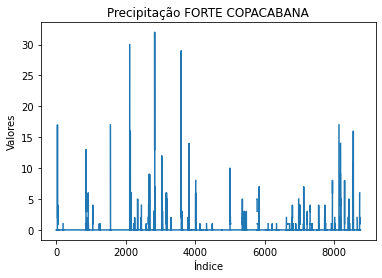

In [55]:
plt.plot(df_copa['PRECIPITACAO TOTAL'])

# Adicionar rótulos e título
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Precipitação FORTE COPACABANA')

# Exibir o gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


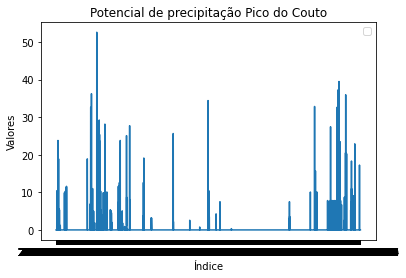

In [54]:
plt.plot(df_pc['scale'])

# Adicionar legenda
plt.legend()

# Adicionar rótulos e título
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Potencial de precipitação Pico do Couto')

# Exibir o gráfico
plt.show()

In [23]:
import numpy as np

In [46]:
def define_value(min,max,c_min,c_max,rgb):

  min_rgb = np.array(c_min)
  max_rgb = np.array(c_max)
  rgb = np.array(rgb)

  normalized_min = min_rgb/255
  normalized_max = max_rgb /255
  normalized_value = rgb/255

  weights = np.array([0.2989, 0.5870, 0.1140])
  linear_value_min = np.dot(normalized_min, weights)
  linear_value_max = np.dot(normalized_max, weights)
  linear_value = np.dot(normalized_value, weights)

  new_min = min
  new_max = max

  scaled_value = new_min + ((abs(linear_value-linear_value_min)*(new_max-new_min))/abs(linear_value_max-linear_value_min))
  return scaled_value
 


In [13]:
135,255,255 azul
1,2,246

0,254,0  verde
0,154,0

255,254,0 amarelo/laranja
255,154,0

253,0,0 vermelho
196,0,1

254,1,255 lilás 
152,87,202


SyntaxError: invalid syntax (1906760638.py, line 1)

In [36]:
def create_scale(row):
    
    R = row['R']
    G = row['G']
    B = row['B']
    
    if R == 0 and G == 0 and B == 0:
        return 0
    
    
    if B <= 2:

        if G < 2:
            min = [253,0,0]
            max = [196,0,1]
            value = define_value(25,90,min,max,[R,G,B])
            return value
        
        if R < 2:
            min = [0,254,0]
            max = [0,154,0]
            value = define_value(1,11,min,max,[R,G,B])
            return value
        
        else:
            min = [255,254,0]
            max = [255,154,0]
            value = define_value(11,25,min,max,[R,G,B])
            return value
        
    else:
        if R > 145:
            min = [254,1,255]
            max = [152,87,202]
            value = define_value(90,150,min,max,[R,G,B])
            return value
        else:
            min = [253,0,0]
            max = [196,0,1]
            value = define_value(0,1,min,max,[R,G,B])
            return value

In [101]:
df_pc['scale'] = df_pc.apply(create_scale, axis=1)

In [102]:
id = df_pc['scale'].idxmax()

In [103]:
id

'2021-04-04--20'

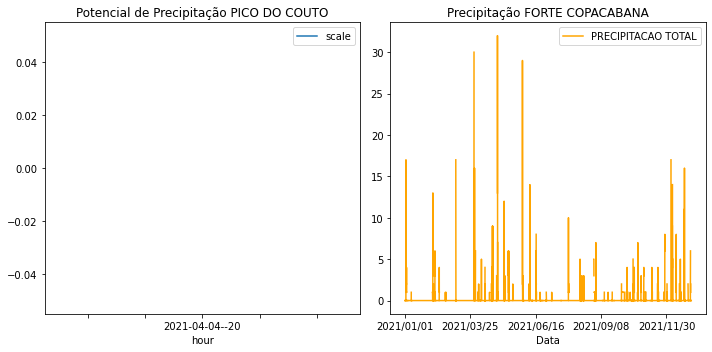

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot da primeira coluna no primeiro subplot
df_pc.plot( y='scale', ax=axes[0])
axes[0].set_title('Potencial de Precipitação PICO DO COUTO')

# Plot da segunda coluna no segundo subplot
df_copa.plot(x='Data', y='PRECIPITACAO TOTAL', ax=axes[1], color='orange')
axes[1].set_title('Precipitação FORTE COPACABANA')

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe os gráficos
plt.show()

In [105]:
df_pc.columns

Index([0, 'R', 'G', 'B', 'scale'], dtype='object')

In [108]:
df_pc.max()

0        NaN
R        0.0
G        0.0
B        0.0
scale    0.0
dtype: float64